In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 


In [2]:
from sklearn import datasets 
boston = datasets.load_boston()
df= pd.DataFrame(boston.data, columns=boston.feature_names)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df['Targets']= boston.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Targets
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Targets    0
dtype: int64

In [6]:
# Checking Correlation

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

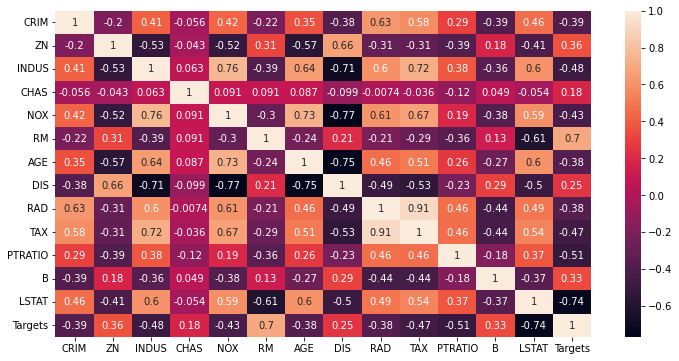

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

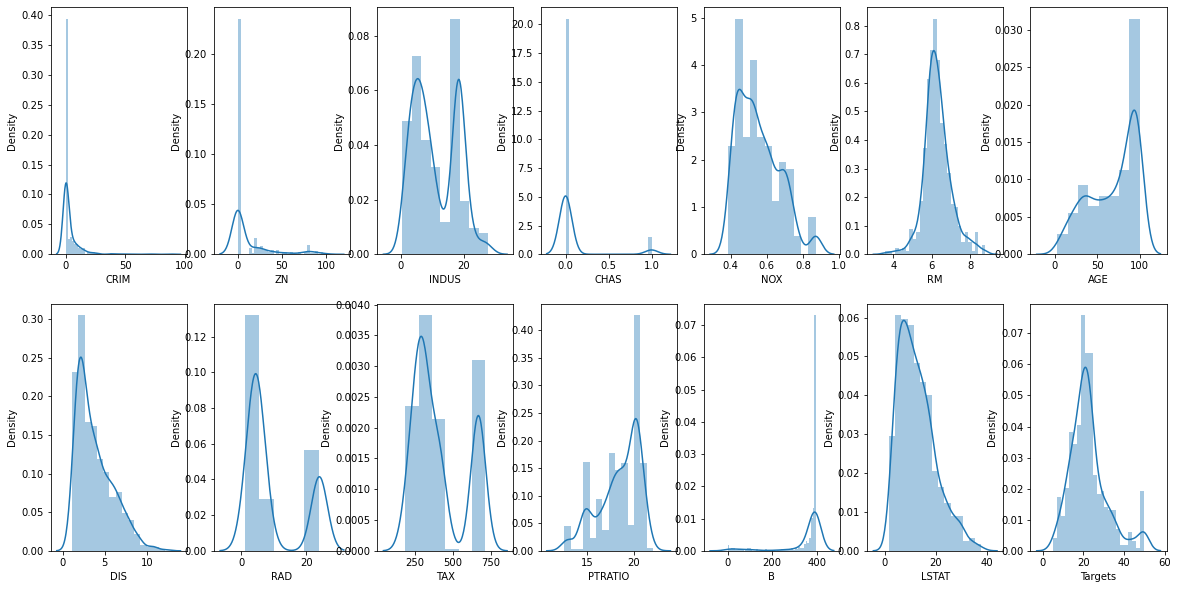

In [9]:
import warnings
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

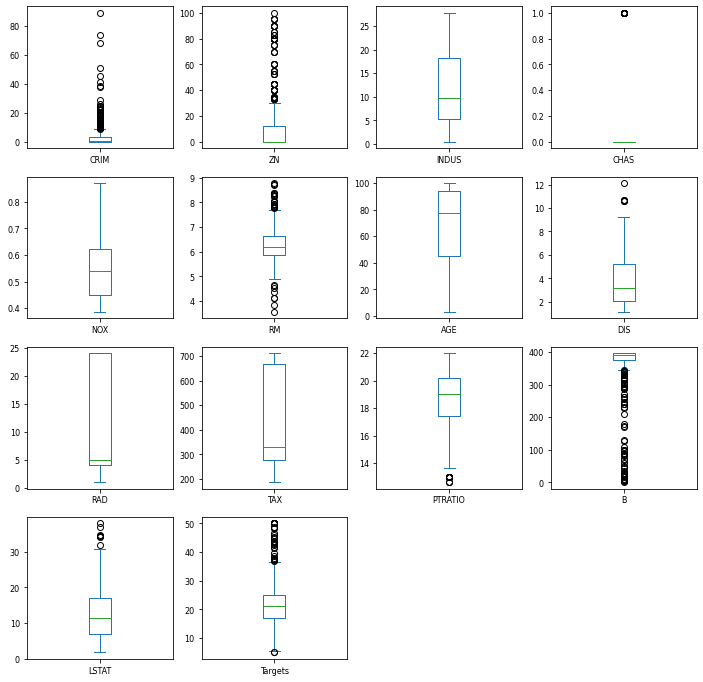

In [10]:
#checking outliers with help of box plot

df.plot(kind='box', subplots=True, layout= (4,4), fontsize=8, figsize=(12,12));

In [11]:
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Targets
0,0.000000,0.18,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,0.208015,15.3,1.000000,4.98,24.0
1,0.000236,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,0.104962,17.8,1.000000,9.14,21.6
2,0.000236,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,0.104962,17.8,0.989737,4.03,34.7
3,0.000293,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,0.066794,18.7,0.994276,2.94,33.4
4,0.000705,0.00,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,0.066794,18.7,1.000000,5.33,36.2


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

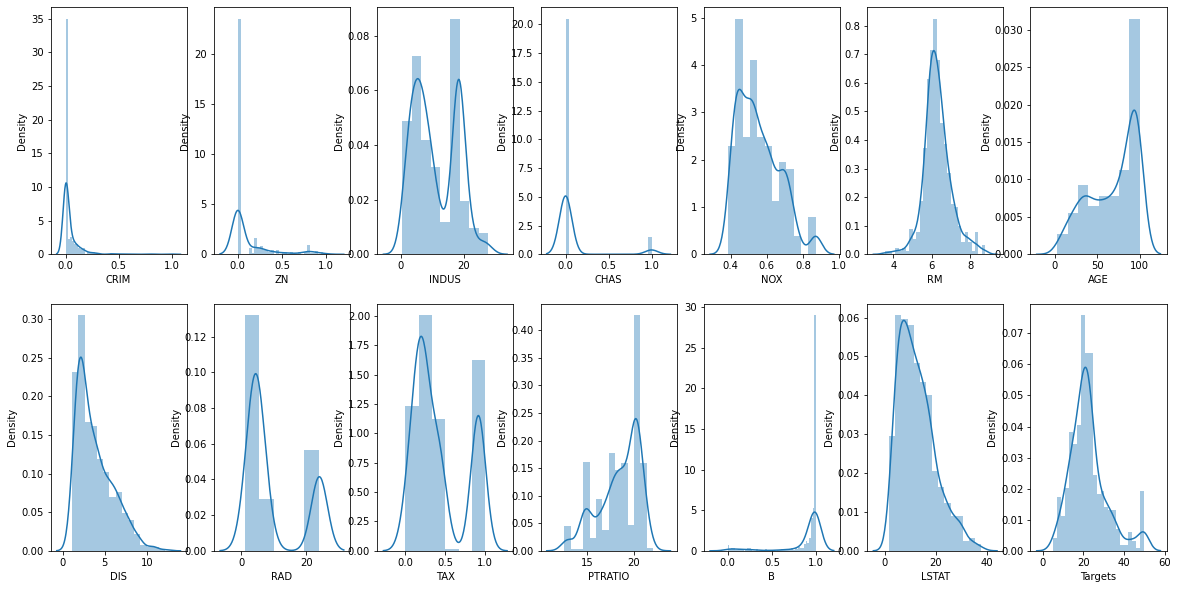

In [13]:
import warnings
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

In [14]:
#standardization (standard normal distribution curve)

In [15]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [16]:
for col in cols:
    df[col] = scaled_cols[col]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

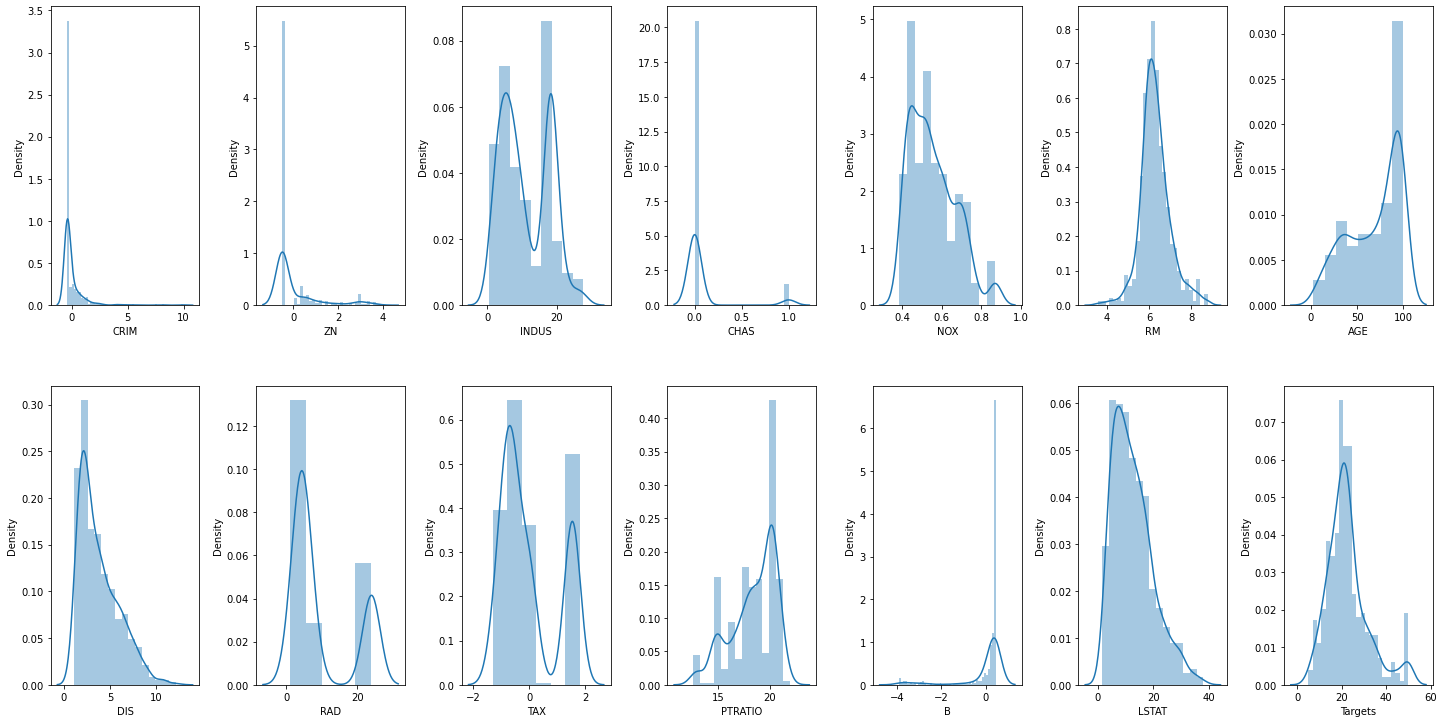

In [17]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split


In [19]:
x= df.drop(["Targets"], axis=1)
y=df['Targets']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model= RandomForestRegressor()

In [23]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
model.score(x_test,y_test)

0.873409017633499

In [25]:
y_pred= model.predict(x_test)

In [27]:
y_pred

array([22.461, 30.867, 16.412, 24.244, 16.515, 21.24 , 20.346, 14.692,
       21.42 , 20.701, 19.985, 20.483,  8.043, 21.46 , 18.888, 26.546,
       18.593,  8.541, 45.249, 15.32 , 24.715, 24.147, 14.327, 24.211,
       15.472, 15.111, 21.567, 14.108, 20.36 , 21.068, 19.828, 23.567,
       32.169, 19.996, 14.056, 16.167, 35.353, 19.339, 21.088, 24.341,
       19.253, 29.409, 45.189, 19.451, 22.512, 14.148, 15.717, 24.683,
       19.054, 27.911, 21.549, 34.261, 17.299, 26.581, 45.377, 21.894,
       15.948, 32.5  , 22.081, 20.582, 26.104, 33.295, 30.058, 18.817,
       26.166, 17.097, 14.146, 23.079, 28.952, 14.904, 20.507, 27.475,
       10.158, 21.841, 21.833,  7.236, 19.83 , 45.694, 11.184, 12.89 ,
       21.695, 11.845, 19.822,  9.078, 20.545, 27.696, 16.189, 23.609,
       23.901, 17.659, 21.884,  7.256, 19.78 , 19.173, 24.087, 19.874,
       37.082, 12.532, 12.191, 12.488, 20.389, 22.992, 13.711, 20.045,
       20.733, 12.376, 19.041, 25.333, 20.59 , 23.288,  8.811, 16.705,
      